# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,1.070018,6.042365,5.321005
1,1.039051,3.647005,5.311715
2,-1.052978,4.768487,4.684107
3,-0.877013,4.398248,4.736896
4,0.305323,4.470019,5.091597


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

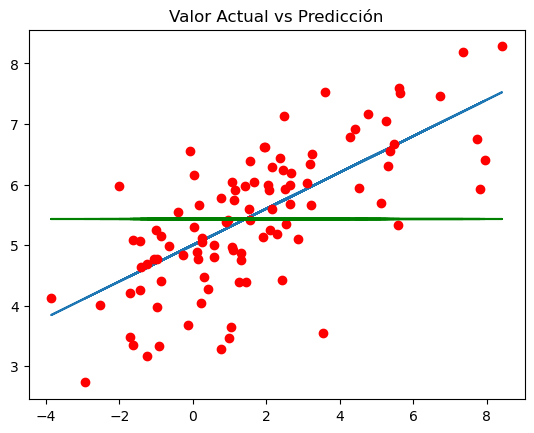

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.070018,6.042365,5.321005,0.012083,0.520360,0.373854
1,1.039051,3.647005,5.311715,0.014212,2.771260,3.182384
2,-1.052978,4.768487,4.684107,0.557743,0.007120,0.438828
3,-0.877013,4.398248,4.736896,0.481681,0.114682,1.066429
4,0.305323,4.470019,5.091597,0.115146,0.386359,0.923347


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

59.85607768342431

In [16]:
SSD

65.84889950261721

In [17]:
SST

133.28573711910002

In [18]:
SSR+SSD

125.70497718604153

In [19]:
R2 = SSR/SST

In [20]:
R2

0.4490808917531721

(array([ 4.,  7., 25., 17., 21.,  9.,  6.,  8.,  2.,  1.]),
 array([-1.5883669 , -1.178695  , -0.76902311, -0.35935121,  0.05032068,
         0.45999258,  0.86966447,  1.27933637,  1.68900826,  2.09868016,
         2.50835205]),
 <BarContainer object of 10 artists>)

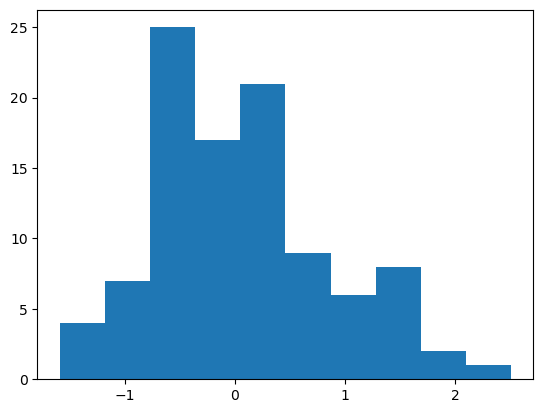

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.6532720341515956, 5.430928590909582)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.899783739401325, 0.32126887804088655)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.070018,6.042365,5.321005,0.012083,0.520360,0.373854,-0.356623,0.340186,5.243547
1,1.039051,3.647005,5.311715,0.014212,2.771260,3.182384,1.095724,0.377268,5.233598
2,-1.052978,4.768487,4.684107,0.557743,0.007120,0.438828,1.792731,7.323787,4.561495
3,-0.877013,4.398248,4.736896,0.481681,0.114682,1.066429,2.612976,6.402344,4.618027
4,0.305323,4.470019,5.091597,0.115146,0.386359,0.923347,1.295257,1.816966,4.997875


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(68.15875346825793, 65.12698365084204, 133.28573711910002)

In [31]:
R2 = SSR / SST
R2

0.5113731967236177

Text(0.5, 1.0, 'Valor Actual vs Predicción')

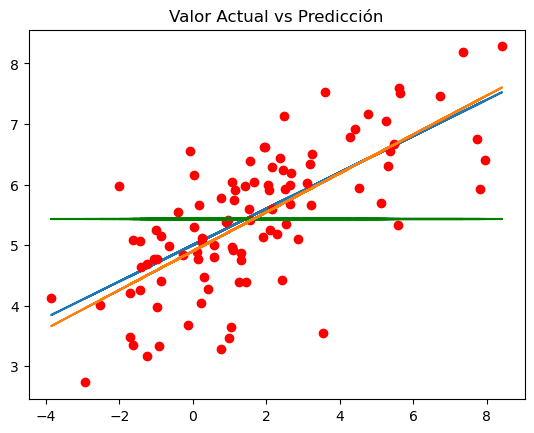

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8152061442737373

In [34]:
np.mean(data["y_actual"])

5.430928590909582

In [35]:
RSE / np.mean(data["y_actual"])

0.1501043754539967